Question No 3 part C solution

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import multi_dot
from math import pi


In [3]:
## Reading the samptimes data
file = open('samptimes.csv')
samptimes = csv.reader(file)


stimes=[]
for row in samptimes:
    stimes.append(row[0])

file.close()

## Reading the y data
file = open('y.csv')
y = csv.reader(file)

Ydata=[]

for row in y:
    Ydata.append(row[0])
file.close()

In [4]:
## Converting the data to numpy array
stimes = np.asfarray(stimes)
X = np.asfarray(stimes).reshape([stimes.size,1])
print("X.sizeNp ",X.shape)
Y = np.asfarray(Ydata).reshape([X.shape[0],1])
print("Yshape = ",Y.shape)


X.sizeNp  (259, 1)
Yshape =  (259, 1)


Function for Producing the matrix A (vectorized implementation) without for loops. More faster :)

In [5]:
def matrix_producer(time_samples, N):
	B=np.int64((N-1)/2)
	B_mat= np.linspace(-B, B, 2*B+1).reshape([2*B+1,1]).T
	A = np.exp(np.dot(time_samples,B_mat)*2*pi*1j)
	return A


Function for Producing matrix W

In [16]:
def W_matrix(W_shape):
    w_line=np.resize([1,100], W_shape)   # create linear array alternating 100 and 1
    W = np.diag(w_line)    # make diagnal array
    
    print(W.shape)
    print(W)
    return W

The fourier_coeff equation derivation is well explained in file Q3.pdf

In [17]:
A = matrix_producer(X,21)    #here X is the samp_times vector
W=W_matrix(259)
                    
fourier_coeff=np.dot(np.linalg.inv(np.dot(np.dot(A.T,W),A)),np.dot(np.dot(A.T,W),Y))
print(fourier_coeff.shape)

(259, 259)
[[  1   0   0 ...   0   0   0]
 [  0 100   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   0   0 ...   0   0   1]]
(21, 1)


In [18]:
#Prediction y=Aa  (a= alpha i.e. fourier coefficients)
y_pred= np.dot(A,fourier_coeff)


/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


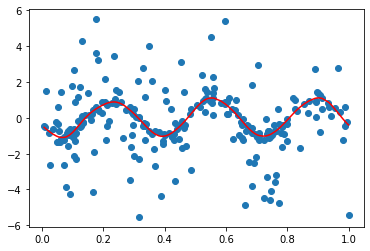

In [19]:
y_pred= (y_pred)
plt.plot(X,y_pred, color = 'r')
plt.scatter(X,Y)
plt.show()